# Linear Regression
## Direct formula and Gradient Descent

We need to fit the function 
$ y = mx + c $
so to minimize the mean squared error.

### Data
We generate synthetic data points with known parameters $m$ and $c$ and some gaussian noise.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For animation
from IPython.display import display, clear_output

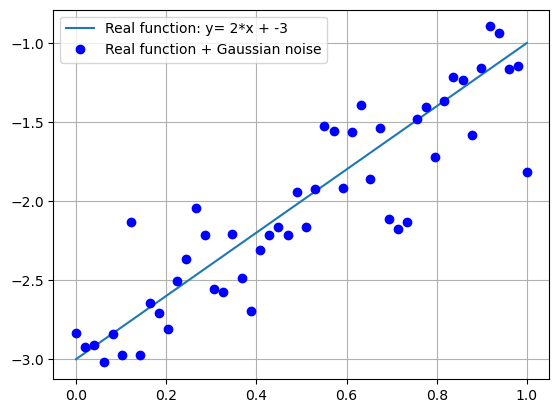

In [7]:
# Synthetic data with Gaussian noise
# y = m*x + c + Gaussian noise

# Parameters of the real function
real_m = 2              # real slope
real_c = -3             # real intercept

# Data
N= 50                          # number of data points
# Generate a column of N random numbers from 0 to 1
data_x = np.linspace(0, 1, N)   # x from 0 to 1
#data_x = np.linspace(0, 1, N)   # x from 0 to 1

real_y = real_m * data_x + real_c
data_y = real_y + np.random.normal(0, 0.3, N)

# Plot a line from (0, real_c) to (1, real_c + real_m)
plt.plot([0, 1], [real_c, real_c + real_m], label = "Real function: y= "+str(real_m)+"*x + "+str(real_c))
# Plot the data points
plt.plot(data_x, data_y, 'bo', label = "Real function + Gaussian noise")
# add grid
plt.grid()

plt.legend()

### Simple Linear Regression (one feature, in our case x):

The equation of a simple linear regression line is given by:

$ y = mx + c $

Where:
- $ y $ is the dependent variable (target).
- $ x $ is the independent variable (feature).
- $ m $ is the slope of the line.
- $ c $ is the y-intercept.

#### Slope ($ m $) Formula:
The slope ($ m $) of the regression line can be calculated directly using the following formula:

$$ m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2} $$

Where:
- $ n $ is the number of data points.
- $ \sum xy $ is the dot product of $x$ and $y$ (sum of the products of corresponding $x$ and $y$) values.
- $ \sum x $ is the sum of $ x $ values.
- $ \sum y $ is the sum of $ y $ values.
- $ \sum x^2 $ is the sum of the squares of $ x $ values.

#### Y-Intercept ($ c $) Formula:
The y-intercept ($ c $) can be calculated using the following formula:

$$ c = \frac{(\sum y) - m(\sum x)}{n} $$

Where:
- $ \sum y $ is the sum of $ y $ values.
- $ m $ is the slope.
- $ \sum x $ is the sum of $ x $ values.
- $ n $ is the number of data points.

In [8]:
# Linear regression by using the direct formula

def calculate_linear_regression(data_x, data_y):
    """calculate_linear_regression(data_x, data_y) -> slope, intercept
    by using the direct formula"""
    n = len(data_x)
    
    # Calculate the necessary sums
    sum_x = np.sum(data_x)
    sum_y = np.sum(data_y) 
    sum_xy = np.dot(data_x, data_y)   #or np.sum(np.multiply(data_x, data_y))
    sum_x_squared = np.sum(np.square(data_x))
    
    # Calculate the slope (m) and intercept (c)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)  # slope
    c = (sum_y - m * sum_x) / n                      # intercept
    
    return m, c


slope, intercept = calculate_linear_regression(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.8213472500128343
Intercept (c): -2.9555066641599286



### Multiple Linear Regression

In multiple linear regression, the relationship between the dependent variable ($y$) and $n$ independent variables ($x_1, x_2, \ldots, x_n$) is modeled as follows:

$y = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n + \varepsilon$

Where:
- $y$ is the dependent variable.
- $x_1, x_2, \ldots, x_n$ are the independent variables.
- $b_0$ is the y-intercept (constant term).
- $b_1, b_2, \ldots, b_n$ are the coefficients for the independent variables.
- $\varepsilon$ represents the error term (the difference between the observed and predicted values).

The coefficients ($b_0, b_1, \ldots, b_n$) in multiple linear regression can be calculated using matrix notation:

$\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

Where:
- $\mathbf{b}$ is a column vector of coefficients.
- $\mathbf{X}$ is the design matrix with rows representing different observations and columns representing independent variables. It includes a column of 1s for the constant term.
- $\mathbf{y}$ is the column vector of observed values (dependent variable).

### Shortcomings of the Direct Formula for Linear Regression

1. **Computational Complexity:**
   - Inverting the matrix ($\mathbf{X}^T \mathbf{X}$) in the direct formula has a time complexity of $O(n^3)$ where $n$ is the number of features. This can be computationally expensive for large datasets.

2. **Numerical Stability:**
   - Matrix inversion is sensitive to numerical precision issues, especially for ill-conditioned matrices. Small numerical errors can lead to significant inaccuracies in the calculated coefficients.

3. **Non-Invertibility:**
   - The direct formula fails when the matrix $\mathbf{X}^T \mathbf{X}$ is singular (not invertible), often due to multicollinearity (linear dependence among features). In such cases, the solution does not exist.

4. **Memory Usage:**
   - Storing and manipulating large matrices in memory can be memory-intensive, leading to potential memory-related issues, especially for big datasets.

5. **Limited Applicability to Online Learning:**
   - In online learning scenarios with continuous data updates, recalculating the entire matrix and its inverse for each update is not efficient.

6. **Absence of Regularization:**
   - The direct formula does not naturally incorporate regularization techniques (Lasso, Ridge) essential for preventing overfitting and feature selection in high-dimensional datasets.

7. **Assumption of Full Rank:**
   - The direct formula assumes the design matrix ($\mathbf{X}$) is full rank. When features are linearly dependent, the matrix may not be full rank, leading to non-invertibility issues.


## Option 2: Gradient Descent

In simple linear regression, the relationship between the actual values ($y_i$) and the predicted values ($\overline{y}_i$) is given by:

$ \overline{y}_i = mx_i + c $

Where:
- $ \overline{y}_i $ represents the predicted value for the $i$-th data point.
- $ m $ is the slope of the regression line.
- $ c $ is the intercept (y-intercept) of the regression line.
- $ x_i $ is the $i$-th input feature.

We use Mean Squared Error (MSE) to measure the goodness of fit between the predicted and actual values. MSE is defined as:

$$ \text{MSE}(y, \overline{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \overline{y}_i)^2 $$

- $ n $ represents the number of data points.

By substituting $ \overline{y}_i $ with $ mx_i + c $ in the MSE formula, we get:

$$ \text{MSE}(y, \overline{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + c))^2 $$

To perform gradient descent, we need to compute the partial derivatives of MSE with respect to $ m $ and $ c $. The derivatives are:

$$
\begin{align*}
\frac{\partial \text{MSE}(y, \overline{y})}{\partial m} 
&= \frac{2}{n} \sum_{i=1}^{n} (y_i - (mx_i + c)) \cdot (-x_i) \\
&= \frac{2}{n} \sum_{i=1}^{n} (y_i - \overline{y}_i) (-x_i) \\
&= \frac{2}{n}  (y - \overline{y}) \cdot (-x) \\
&= - \frac{2}{n} x \cdot(y - \overline{y}) 
\end{align*}
$$


$$ \frac{\partial \text{MSE}(y, \overline{y})}{\partial c} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \overline{y}_i) $$

In gradient descent, we iteratively update the coefficients $ m $ and $ c $ using the gradients and a learning rate ($ \text{learning\_rate} $). The updates are given by:

$$
\begin{align*}
 m' &= m - \left( \frac{\partial \text{MSE}(y, \overline{y})}{\partial m} \right) \times \text{learning\_rate} \\
 c' &= c - \left( \frac{\partial \text{MSE}(y, \overline{y})}{\partial c} \right) \times \text{learning\_rate} 
\end{align*}
$$


Gradient Descent and using the direct formula (normal equation) are two methods to compute linear regression. 

- Gradient Descent is more efficient when dealing with large datasets. Computing the normal equation involves matrix operations (computing the inverse of a matrix in the normal equation) which can become computationally expensive for large datasets, especially if the number of features is high.
- Gradient Descent can be used with various cost functions beyond the mean squared error, making it flexible for different regression problems.
- Gradient Descent can be parallelized, allowing for faster computation on parallel architectures.
- One has control over the number of iterations and learning rate, to balance between accuracy and computational resources.

Gradient Descent is often preferred in scenarios involving large datasets, online learning, memory constraints, and when there's a need for flexibility in terms of cost functions and regularization techniques.

## Gradient descent

In [9]:
def gradient_descent(data_x, data_y, iterations=500, learning_rate=0.05):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    
    for _ in range(iterations):
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        
        # Compute the gradient using vectorized operations
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # Update m and c
        m = m - dm * learning_rate
        c = c - dc * learning_rate

    return m, c

slope, intercept = gradient_descent(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.7357467658896693
Intercept (c): -2.909564737008148


In [10]:
# Gradient descent without vector operations

def gradient_descent_novec(data_x, data_y, iterations=1000, learning_rate=0.05):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept
    linear regression by using the gradient descent algorithm
    without vector operations"""

    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    
    for _ in range(iterations):
        # Compute the current error
        y = data_x * m + c      # predicted value
        
        # Compute the gradient point by point
        dm = 0
        dc = 0
        for i in range (N):          # derivative over all points
            dm += data_x[i] *(data_y[i] - y[i]) # derivative of the loss w.r.t. m in point xi
            dc += data_y[i] - y[i]              # derivative of the loss w.r.t. c in point xi
        dm = -2/N * dm               
        dc = -2/N * dc
        
        # Update m and c
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
    return m, c

slope, intercept = gradient_descent_novec(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.8185775062074085
Intercept (c): -2.9540201378926834


### Visualization
We will visualize:
- How the loss decreases with the number of iterations
- How the values of the slope($m$) and the intercept ($c$) converge
- How the lines progressively fit the data points

In [11]:
# The same gradient descent function as above, but returns also data for visualization: m,c,and loss for each iteration

def gradient_descent_meta(data_x, data_y, iterations=500, learning_rate=0.05):
    """gradient_descent(data_x, data_y, iterations=1000, learning_rate=0.05) -> slope, intercept, mc, loss
    linear regression by using the gradient descent algorithm"""
    N = len(data_x)
    m, c = 0, 0  # initial values for m and c
    mc = []      # save the values of m and c for visualization only
    loss = []
    
    for _ in range(iterations):
        # Compute the current error
        y = data_x * m + c      # predicted value
        error =  data_y - y     # vector of differences between predicted and actual
        loss.append (np.sum(error**2)/N)
        
        # Compute the gradient using vectorized operations
        dm = -2/N * np.dot(error, data_x)
        dc = -2/N * np.sum(error)
        
        # Update m and c
        m = m - dm * learning_rate
        c = c - dc * learning_rate
        
        # Save the current values of m and c
        mc.append((m, c))

    return m, c, mc, loss

slope, intercept, mc, loss = gradient_descent_meta(data_x, data_y)
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 1.7357467658896693
Intercept (c): -2.909564737008148


Text(0, 0.5, 'Loss')

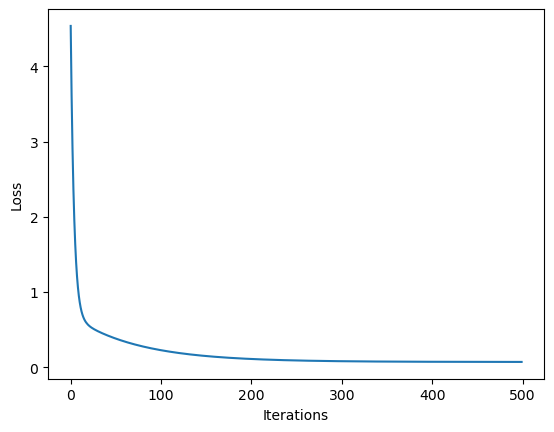

In [12]:
m,c,mc,loss = gradient_descent_meta(data_x, data_y)
# The loss is decreasing with the number of iterations

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

,m,c
0,-0.086444,-0.204483
1,-0.159753,-0.384196
2,-0.221608,-0.542272
3,-0.273477,-0.681448
4,-0.316640,-0.804112
...,...,...
495,1.733365,-2.908286
496,1.733966,-2.908609
497,1.734564,-2.908930
498,1.735157,-2.909248


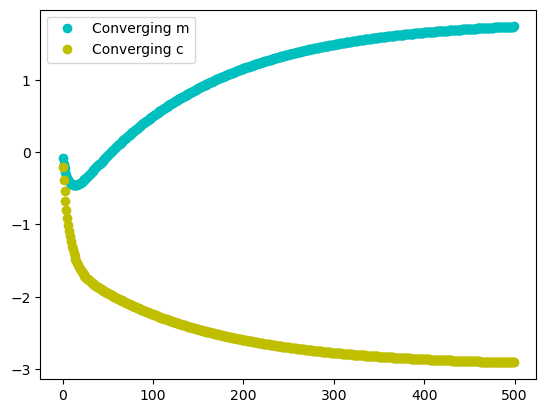

In [13]:

df = pd.DataFrame()
df[["m","c"]] = mc

plt.plot(list(range(len(mc))), df["m"], "co",  label = "Converging m")
plt.plot(list(range(len(mc))), df["c"],  "yo", label = "Converging c")

plt.legend()
df

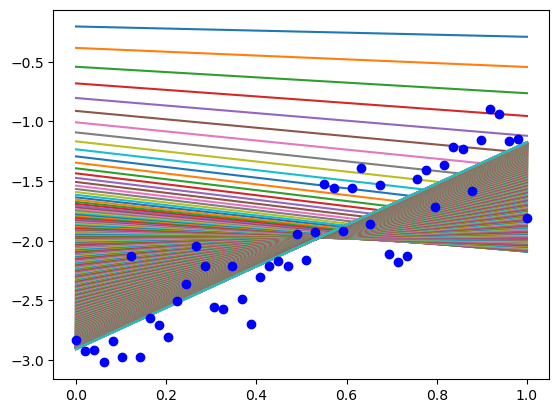

In [14]:
# Create the figure and axes
fig, ax = plt.subplots()

for m,c in mc:
    plt.plot([0, 1], [c, m+c] )      # Plot the line for a specific m and c
plt.plot(data_x, data_y, 'bo', label = "Data")   # Plot the data points

plt.show()


## Animation


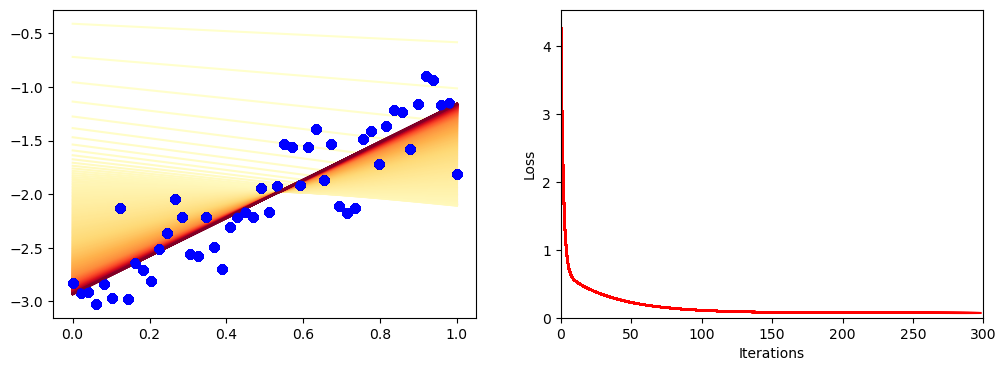

In [15]:
iterations = 300
m,c,mc,loss = gradient_descent_meta(data_x, data_y, iterations, learning_rate=0.1)

# Enable interactive plots in Jupyter Notebook
#%matplotlib inline

# Create two figures side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(data_x, data_y, 'bo', label="Data")

# Create a colormap from yellow to red
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(mc)))

# Function to update the plot in each animation frame
def update(frame):
    if frame < len(mc):
        m, c = mc[frame]
        color = colors[frame]  # Get color from the colormap
        ax1.plot([0, 1], [c, m + c], color=color)
        ax1.plot(data_x, data_y, 'bo', label="Data")  # Plot blue dots on top of lines
        ax2.plot(list(range(frame)), loss[0:frame], 'r-', label="Loss")
        ax2.set_xlabel("Iterations")
        ax2.set_ylabel("Loss")
        ax2.set_xlim(0,iterations)    #fix the x axis to 500 iterations
        ax2.set_ylim(0, max(loss))             #fix the y axis to 1
        plt.draw()
      #  plt.pause(0.001)
        clear_output(wait=True)  # Clear the previous output for a clean animation
        display(fig)  # Display the updated figure
    else:
        plt.close(fig)  # Close the figure after all lines are plotted

# Run the animation
for i in range(len(mc) + 1):
    update(i)



## Stochastic and Mini-batch Stochastic Gradient Descent
These adaptations of the standard gradient descent algorithm use a subset of the training data for each iteration of the algorithm. SGD will use one example per weight update, and mini-batch SGD will use a predefined number (typically much smaller than the total number of training examples). This allows training to occur much faster, as it requires far fewer computations since we do not use the entire data-set in each iteration.

Stochastic gradient descent is used for training deep neural networks.

### Exercise: Implement your own LinearRegression class
1. Implement your own LinearRegression class by using the gradient descent function
2. Compare the result with Scikit's LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Note: You need to reshape the data for SciKit ```data_x.reshape(-1, 1)```  to covert from 1D array to a 2D array

In [16]:
# 1. Implement your own LinearRegression class by using the gradient descent algorithm in Scikit-learn
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

class MyLinearRegression(BaseEstimator,RegressorMixin):
    def __init__(self, iterations=1000, learning_rate=0.05):
        '''The init function saves the parameters into member attributes (self....))'''
        pass
    
    def fit(self, data_x, data_y):
        '''The fit function calculates the slope and intercept by using the gradient descent algorithm. 
        It saves the values into member attributes (self.c and self.m) so that the predict function can use them.'''
        pass
                  
    def predict(self, data_x):
        '''The predict function calculates the predicted values for the given data_x by using the slope and intercept. 
        It returns the predictions as a numpy array.'''
        pass
    
# 2. Compare with the Scikit-learn LinearRegression
print("\nMyLinearRegression")
# initialize the class
# fit the data
# print the slope and intercept

print("\nScikit-learn LinearRegression")
# initialize the class
# fit the data
# print the slope and intercept



MyLinearRegression

Scikit-learn LinearRegression


### Solution

In [17]:

# Solution

# MyLinearRegression class
class MyLinearRegression(BaseEstimator,RegressorMixin):
    def __init__(self, iterations=1000, learning_rate=0.05):
        self.name = "MyLinearRegression"
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.m = 0
        self.c = 0
    
    def fit(self, data_x, data_y):
        self.m, self.c = gradient_descent(data_x, data_y, self.iterations, self.learning_rate)
        return self
    
    def predict(self, data_x):
        return data_x * self.m + self.c
    
# Compare with the Scikit-learn LinearRegression
print("\nMyLinearRegression")
my_lr = MyLinearRegression()
my_lr.fit(data_x, data_y)
print("Slope (m):", my_lr.m)
print("Intercept (c):", my_lr.c)

print("\nScikit-learn LinearRegression")
sk_lr = LinearRegression()
sk_lr.fit(data_x.reshape(-1, 1), data_y)   # reshape(-1, 1) converts a 1D array to a 2D array
print("Slope (m):", sk_lr.coef_[0])
print("Intercept (c):", sk_lr.intercept_)



MyLinearRegression
Slope (m): 1.8185775062074085
Intercept (c): -2.9540201378926834

Scikit-learn LinearRegression
Slope (m): 1.8213472500128338
Intercept (c): -2.955506664159928


## More exercise ideas
1. Implement the gradient descent algorithm for a function with two independent variables (x1 and x2)
- y = m1 * x1 + m2 * x2 + c
- What is the gradient of the loss function w.r.t. m1, m2, and c?

2. Implement stochastic mini-batch gradient descent (SGD) by using the gradient descent algorithm.
- Each iteration should use small a random subset of the data points for training the model.

3. Implement gradient descent for fitting a polynomial function.
- Make it for polynomial of degree 2 (square function) first
- Make the degree of a polynomial a parameter